In [ ]:
# The Python modules you need for thisn assignment.
import pandas as pd
import os.path
import urllib.request 
import os.path
from matplotlib import pyplot as plt
import networkx as nx
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score



url_dir = 'https://gawron.sdsu.edu/python_for_ss/course_core/data'

## Final Assignment

Loading and applying the style sheets in the next two cells customizes the styles of your notebook output,
in particular for how pandas `DataFrame`s are printed.

This is optional,  but it's interesting if you know anything about css files.

In [ ]:
target_url1 = os.path.join(url_dir,'style-notebook.css')
target_url2 = os.path.join(url_dir,'style-table.css')

with urllib.request.urlopen(target_url1) as fh1:
    css1 = fh1.read().decode('utf8')
with urllib.request.urlopen(target_url2) as fh2:
    css2 = fh2.read().decode('utf8')
css = css1 + css2

In [ ]:
from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

The next cell loads the `titles` DataFrame, the first of two used in this assignment.  There are only
two columns, `'title'`  and `'year'`.

In [ ]:
titles = pd.read_csv(os.path.join(url_dir,'titles.csv'))
titles.head()

,title,year
0,The Patriarchs,2009
1,Angels in the Attic,1998
2,The Rapture,1991
3,Star na si Van Damme Stallone,2016
4,Sweet Talk,2004


The next cell loads the `cast` DataFrame, the second of two used in this assignment.  This is
large and will take a while.

In [ ]:
# This is much larger and wont work in google colab at the moment
#cast = pd.read_csv(os.path.join('data','cast.csv'))
cast = pd.read_csv(os.path.join(url_dir,'truncated_cast.csv'),index_col=0)
cast.head()

,title,year,name,type,character,n
0,In the Land of the Head Hunters,1914,Paddy 'Malid,actor,Kenada,5.0
1,The Colour of Darkness,2016,Ketan Daraji -Gohel,actor,Chhagan,NaN
2,London Betty,2009,Isaiah Entsua -Mensah,actor,Camera Man,NaN
3,Candelabra,2014,Groovin .,actor,Lt. Dick Sims,5.0
4,Bad Ideas,2012,Hamid .,actor,The Diner,NaN


### 1.  Create the actor graph  (10 Points)

For this problem we will work on a subset of the rows of cast that have non-trivial
casts: casts with more than one actor in them.  The DataFrames created in the cell below
are used in Step 0 of this problem.

In [ ]:
cast00 =  cast[cast['n'] < 10]  ## Add a value  cast[cast['n'] < 10]
print(f"{len(cast)=:,}     {len(cast00)=:,}")
cast_non_triv_cts = cast00.groupby(['title','year']).size()
# This gives the index of films we want
cast_non_triv0 = cast_non_triv_cts[cast_non_triv_cts > 1]
len(cast),len(cast00)

len(cast)=422,960     len(cast00)=192,403


(422960, 192403)

Steps

0.  Create a subDataFrame of `cast` (call it `cast0`) with roles from films with cast sizes greater than 1 and only the roles whose value in the `n` column is less than 10 (This is to restrict attention to the most important roles in each film and it has been done for you in the cell labeled Step 0).

   ```
   cast: 422, 960     cast0: 172,716
   ```

1.  Group the rows of `cast0` so that each group is a film, where a film is a pair of title and a year (remember that movies like *Ben Hur* have been made more than once).

   ```
   Number of groups = Number of films = 24,214
   ```
   
   You really only care about the `name` column in each group, so convert your `GroupBy` instance
   `gb` into a `SeriesGroupBy` instance by doing `gb["name"]`. 
   
   This has been done for you in the cell labeled Step 1).
   
2.  Create a `networkx` graph (Call it `G`) using the `groupby` object from step 1, where each node is an actor/actress and there is an edge between two nodes if and only if the two actors were cast in the same film (according to `cast0`). 

   ```
   len(G) = 36,776 
   len(G.edges) = 511,778
   ```
   
   **This has not been done for you.  Providing the code for creating the graph is worth 10 points on this takehome final.** 
   
   Hint: Review the graph construction (word graph) problem on the Social Networks assignment.  
     
   Hint: Loop through the group Series object created in step 1.
   
   ```
   for xx in gb['name']:
   ```
   
   Each `xx` will correspond to a group (a film). See example below. You should be able to use `xx` to find all the actors in that film and an add edges to `G` for each pair of actors in the film.  You will probably find the `G.add_edges_from(...)` method useful as hinted at below.

#### Step 0 (Done for you)

In [ ]:
#cast0 =  cast_non_triv[cast_non_triv['n'] < 10]  ## Add a value  cast[cast['n'] < 10]
cast0 = cast00[cast00.set_index(['title','year']).index.isin(cast_non_triv0.index)]
print(f"# Films with cast sizes greater than 1: {len(cast_non_triv0):,}   Total number of roles: {len(cast0):,}")

# Films with cast sizes greater than 1: 24,214   Total number of roles: 172,716


####  Step 1 (Done for you)

In [ ]:
# Create the Series groupby object using cast0.  Remember: A film is a pair of a title and a year.
# You can convert a groupby instance `gb` into a `SeriesGroupBy` instance by doing `gb["name"]`
# Then the group members of each group will be the cast of a film.
cg =   cast0.groupby(['title','year'])['name']    

In [ ]:
len(cg)

24214

#### Getting a group/Looping through the groups

We illustrate what the groupby object looks like/does. In the following cells `cg` is a `SeriesGroupBy` instance created by the code above, where each group in `cg` corresponds to a film (a title, year pair).

For example,

In [ ]:
cg1_ser = cg.get_group(('Bringing Up Baby', 1938))

In [ ]:
type(cg1_ser)

pandas.core.series.Series

The `Series` `cg1_ser` contains the 9 most important members of the cast of "Bringing Up Baby" (in no particular order).

In [ ]:
cg1_ser

39546        Walter Catlett
76841            Fritz Feld
79186      Barry Fitzgerald
93632            Cary Grant
119042        George Irving
212805      Charles Ruggles
314206    Katharine Hepburn
354474        Leona Roberts
354719           May Robson
Name: name, dtype: object

So this film licenses 9 nodes and 36 edges in the graph, because
there are 9 actors, and since there are 36 actor pairs: (9*8)/2,
we draw 36 edges  among the 9 actors.

So this subpart of the actors graph looks like this (with the 9 actors
represented as the integers 0-8 and 36 edges).

complete_graph(9) Num nodes: 9 Num edges: 36


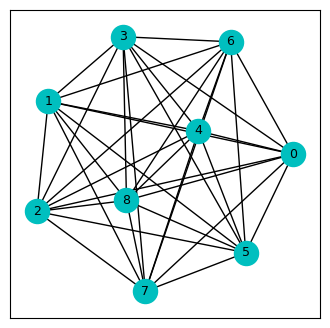

In [ ]:
import networkx as nx
(fig,ax) = plt.subplots(1,1, figsize=(4,4))

nonad = nx.complete_graph(9)
print(f"complete_graph(9) Num nodes: {len(nonad)} Num edges: {nonad.number_of_edges()}")
nx.draw_networkx(nonad,ax=ax,node_color='c',font_size=9)

The number of edges (36) can be computed by using the number of pairs in a set of size n:  (n * (n-1))/2.

In [ ]:
(9*8)/2

36.0

A more useful way of looking at it for writing the code is to pair each actor with all the actors below them in the cast list above.  Walter Catlett
gets paired with 8 other actors.  Fritz Feld gets paired with 7 others
(he's already paired with Walter Catlett). Barry Fitzgerald gets paired
with 6 others, and so on until Lenoa Roberts gets paired with May Robson. So the number of pairs is:

In [ ]:
8 + 7 + 6 + 5 + 4 + 3 + 2 + 1

36

The key computational point is that it works to pair
each actor with the actors below them on the cast list, and
add an edge for each pair. This works because
when you add the edge 

```
(`Walter Catlett`, `Fritz Feld`)
```

there is no longer any point in adding the edge

```
(`Fritz Feld`, `Walter Catlett`).
```

It's an undirected Graph (no arrows on the edges), so
these are the same edge; `networkx` enforces this,
as is demonstrated in the next cell.

Looping through the `SeriesGroupBy` instance `cg`;  `cg` is an iterable of pairs of the form `((title,year), Ser)`, where  the tuple `(title,year)` indexes a particular movie and `Ser` is a `pandas Series` containing the cast of that movie. Since it's the cast sequence you will use to construct the graph, it's `Ser` you care about.

In [ ]:
j = 0
for (i,g) in  enumerate(cg):
    print(len(g))
    # Movie tuple
    print(g[0])
    print(type(g[1]),len(g[1]))
    # the entire cast. This film has 9 cast members.
    print(g[1])
    # Example stopped after looking at just one group (film) 
    if i == j:
        break

2
('$10 Raise', 1935)
<class 'pandas.core.series.Series'> 9
17624     William 'Billy' Benedict
23194                   Glen Boles
43962             Berton Churchill
64623                Alan Dinehart
114116       Edward Everett Horton
165593                Frank Melton
251236                  Ray Walker
326709             Rosina Lawrence
340578                Karen Morley
Name: name, dtype: object


#### Step 2 Making the actor graph (not done for you)

**Note:  Writing the code to finish the cell below is how you get youir
10 points for this problem.**

In [ ]:
import networkx as nx
G = nx.Graph()

##  Your code here  

In [ ]:
len(G),len(G.edges)

(36776, 511778)

In [ ]:
len(G),len(G.edges)

(36776, 511778)

####  Backup actor graph for thos who couldn't get their graph-building code to work

In [ ]:
# import networkx as nx
import urllib.request
import os.path

def url_fetch_networkx_graph (url):
    with urllib.request.urlopen(url) as filehandle:
         G = nx.read_gml(filehandle)
    return G

github_networks_data = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/networks/'
actor_graph_url = os.path.join(github_networks_data, 'final_assignment_actor_graph.gml')

G3 = url_fetch_networkx_graph (actor_graph_url)

###  Answer the following questions about G

Be sure to verify each answer with a code snippet.  You won't get credit
for your answers unless you provide the code snippet that answers the question.

###  2.  How many actors are there in G? (2 points)

In [ ]:
## Your code here

36776

### 3.  How many edges does G have?  (2 points)

Attention:  This would only be `(len(G)*(len(G)-1))/2` if
all actor pairs had appeared in films together.  They haven't.

In [ ]:
# Your code here

511,778


Not the answer:

In [ ]:
print(f"{(len(G)*(len(G)-1))/2:,}")

676,218,700.0


### 4.  How many actors is Barry Fitzgerald connected to in `G`?  How many actors is Cary Grant connected to?  (2 points)

###  5.  What are the degree centrality values for Barry Fitzgerald and Cary Grant? (3 points)

### 6.  Have Josephine Hutchinson and Cary Grant ever appeared in a film together (according to `G`)?  (3 points)

Again if you are a film buff and happen to know whether Josephine Hutchinson and Cary Grant ever appeared in a movie together, that is of no use to you here.  You need the code snippet that looks up that fact in G.

### 7.  List the actors with the top 10 degree centralities  (5 points)

More specifically, construct a list with just the top 10 actors in the order
of their degree centrality in G from highest to lowest.  To be clear, the list should
**not** include the centrality values.

### 8. Find the actor who has appeared in the most films in the cast data set  (5 points)

### 9.  Compute the average clustering coefficient for G (5 points)

Discussion question.  You will get a major deduction if you don't have any discussion.

The question you are going to answer is:  Is the clustering coefficient for G higher or lower than
that of most social networks?  You will estimate a rough answer for this question
by comparing the average clustering coefficient of the Karate Graph and the Florentine Familes graph, both available in `networkx`.  In a sentence or two, explain why you would expect the clustering coefficient to be higher/lower than it is for most social networks. You may find your explanation facilitated by also computing the **density**
of G (see the new networkx notebook discussion on clustering coefficient for random graphs, the Zachary's karate club graph, and Florentine Families).

You may or may not want to cite a source. If you do, "I googled it," is not a valid citation. Then do the computations to validate your guess.  The intended way to answer this question is to think about what property the clustering measures and then think about some specific features of the actor's network might increase/decrease the measure of that property.

In [ ]:
# Your code here

Your discussion here

### 10. Make a barplot showing the number of films that have been released each decade using all films made in or before 2022  (4 points)

Helpful hint.   You may use `titles`.

You should use your plot to answer the following ancillary question.  Excluding the 2020 decade (which has incomplete data), in what decade did the number of films
made go down?  Can you come up with an explanation as to why?

[Your answer to the ancillary question goes here]

### 11. Plot the number of "Hamlet" films made each decade.  (4 points)

In [ ]:
# Your code here

### 12.  In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?  Which value of n shows the least gender disparity?  Can you think of a reason why?  (5 points)

In [ ]:
# Your code here

### 13.  List each of the movies (year/title pairs) in which Peter Sellers has played at least two roles (there are 7) (5 points)

Use cast0.

In [ ]:
#### List each of the movies (year/title pairs) in which Peter Sellers has played at least two roles


### 14.  How many films has Peter Sellers appeared in?  Use cast0 data.   (5 points)

Note: This is mildly tricky because as we saw above, there are a number
of cases in which he has played multiple roles in the same film.
Helpful hint: Therefore 32, the number of rows in which "Peter Sellers"
appears in the `"name"` column in cast0 data, is the wrong answer.

In [ ]:
# Your code here

### 15.  Create a Series which is indexed by Actor/Actress names and contains the number of films each actor has appeared in.  Your answer should account for the fact that a single actor can play multiple roles in a single film.   Use cast0 data.  (5 points)

Hint One:  Use Peter Sellers as a test case and call your answer `num_films`.
Then `num_films['Peter Sellers']` should give the answer you gave above for the number of films Peter Sellers has appeared in, and it should not be 32.

Other tests to replicate:

```
>>> num_films['Cary Grant']
42
>>> len(num_films)  
36776
```

Where the last number is of course the number of actors in
the cast0 data.

Hint Two:  For a `Series`, the method `.nunique()` returns the number of unique values in the `Series` (an integer). For a `SeriesGroupBy` instance it gives the number of unique values by group. 

In [ ]:
# Your code here

### 16.  What actor has appeared in the most films? Use cast0 data.  (5 points)

In [ ]:
# Your code here

### 17.  List the actor who has played the most roles in a single film together with the year and title of the film and the number of roles played. Optionally (for no extra credit, in a separate computation), list the roles that actor played in that film. (5 points)

In [ ]:
# Your code here

And here are the  roles.  Who can forget X's performance as Y?

In [ ]:
# Youe code here

### 18.  Define the actress surplus of a film as the number of actress roles minus the number of actor roles.  What film had the greatest actress surplus alltime? Note:  Use cast as defined above, not cast0 as defined above. (5 points)

Hint: Begin by creating
a DataFrame indexed by films with actor and actress columns giving the number of actresses
and actors in each film.  

### 19.  Build a classifier which assigns classes to wine data (10 points)

You must fill in the code cell below per the instructions.,
and you must answer the discussion questions that follow.

In this problem you will load some data from scikit_learn, in particular [the wine recognition data set from scikit learn](https://scikit-learn.org/stable/datasets/toy_dataset.html),
which tries to discriminate 3 wine classes based on  13 features. You can read about this dataset by 
following the link.  Your problem will be to discriminate `class_0` from the other two.
Make sure you update your `target` as we did with a similar problem in the regression
and classification assignment.

Try using at least five classifiers on the data (at least one SVM, as well as the Bernoulli Naive Bayes model). See the regression and classification notebook, as well as the solution to the text classification assignment, for help on where to get these and other classifiers.

Be sure to get the average of at runs least 10 runs for all classifiers.
Be sure to get accuracy, precision, and recall for all
classifiers on those multiple runs.


There  are some guidelines on the discussion part of this question below the code cell.

In [ ]:
## Your code goes here.  You will need to add more imports to those given
def split_vectorize_and_fit(T,L,clf,pos_label='pos'):
    """
    Added default value for pos label
    Added classifier argument.  
    """
    T_train,T_test, y_train,y_test = train_test_split(T,L)
    tf = text.TfidfVectorizer()
    X_train = tf.fit_transform(T_train)
    clf.fit(X_train, y_train)
    X_test = tf.transform(T_test)
    predictions = clf.predict(X_test)
    return precision_score(y_test,predictions,pos_label=pos_label), \
           recall_score(y_test, predictions,pos_label=pos_label), \
           accuracy_score(y_test,predictions)

from sklearn.datasets import load_wine
data = load_wine()


#### Evaluation report 

In this section discuss your results. Which classifier did best on precision?  
Which classifier did best on accuracy? 
Which classifier did best on recall?  
Which classifier did best overall?  How did you deciode that?

Which is each classifier most likely to do

> a. Call what actually a class_0 wine a non class_0 wine; or

> b. Call what is non class_0 wine and clas_o wine.

For 5 points midterm score extra credit, train your classifier on three classes, 
Rather than report precision and recall numbers, give the confusion
matrix for the three classes in the format used at the end of the regression/classification notebook
for the iris data, using just one of your training/split/eval runs.


### 20. Using cast0 as defined above to provide your statistics, train and test a linear regression model that  predicts the degree_centrality of an actor/actress from the number of films they have appeared in and their average n-value.  Your testing should evaluate the model's performance using mean squared error.  (10 points)

Hint one:  You will have an easier time using the code from the simple_regression
notebook for a model if you create a DataFrame with columns 
for the two variables you are using as predictors (1. the number
of films an actor has appeared in and 2. the average n-value of their
roles) and another column for the variable you're predicting (the actor's degree
centrality in G, the actors network you built above). Call this `DataFrame` `regression_df`.  The index of `regression_df` should be actor names. There are 36,776 unique `"name"` values in the `cast0` data, so  `regression_df` should have 36,776 rows.  

Hint Two: If you're lucky, you created each predictor column 
as a `Series` indexed by actor names in a previous problem, and you created the
predicted column (degree centrality) as a dictionary with actor name keys
in a previous problem.

In that case, you 
may be able to adapt the following code snippet to create your `regression_df`:

```
regression_df = pd.DataFrame({'num_films': num_films,
                             'mean_n': mn_n,
                             'centrality': dc
                             })
```

For full credit you must test your model.  This means you must separate your data into training and test sets.   Reserve about 10% of your data for testing.  The following
code snippet may be of use or you may find using the model given in the classification problems
easier.

```
import random

sample_size = len(regression_df)
test_sample_size = sample_size//10

remove_indices = random.sample(list(regression_df.index),k=test_sample_size)
keep_indices = list(set(regression_df.index) - set(remove_indices))

training_data= regression_df.loc[keep_indices]
test_data= regression_df.loc[remove_indices]
```


In [ ]:
# Your train/test split and training code here

In [ ]:
# Your evaluation code here (mean squared error)